In [486]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [487]:
df=pd.read_csv('diabetes.csv')
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [488]:
# Checking missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [489]:
# remove duplicates
df = df.drop_duplicates()

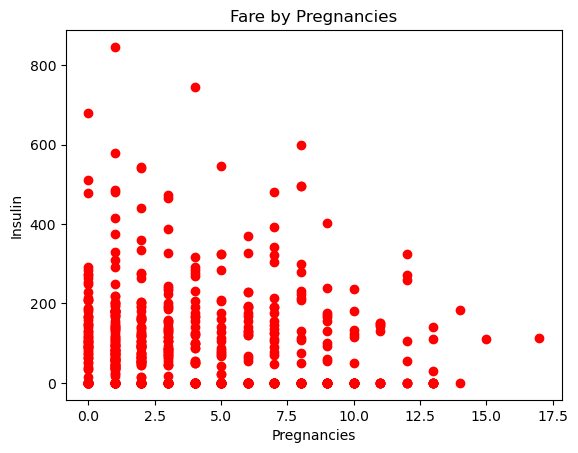

In [490]:
# check noise by scatter 

plt.scatter(df.Pregnancies, df['Insulin'], marker='o', color='red')

plt.xlabel('Pregnancies')
plt.ylabel('Insulin')
plt.title('Fare by Pregnancies')

plt.show()

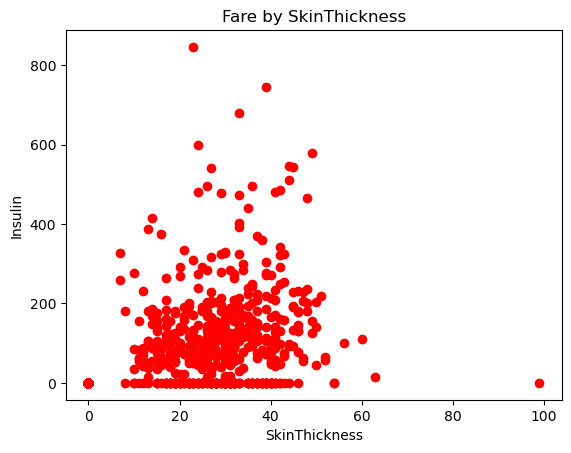

In [491]:
plt.scatter(df['SkinThickness'], df['Insulin'], marker='o', color='red')

plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('Fare by SkinThickness')

plt.show()

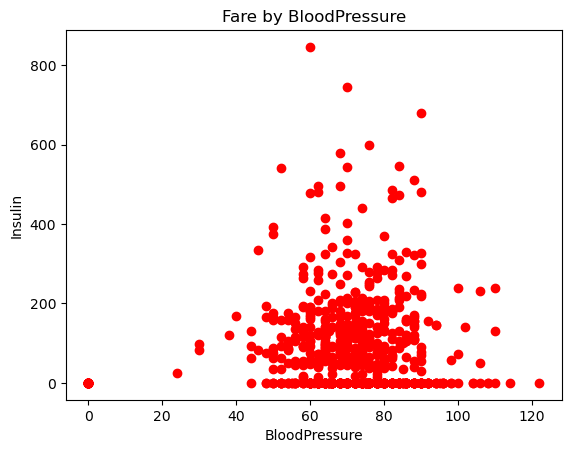

In [492]:
plt.scatter(df['BloodPressure'], df['Insulin'] , color='red')

plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.title('Fare by BloodPressure')

plt.show()

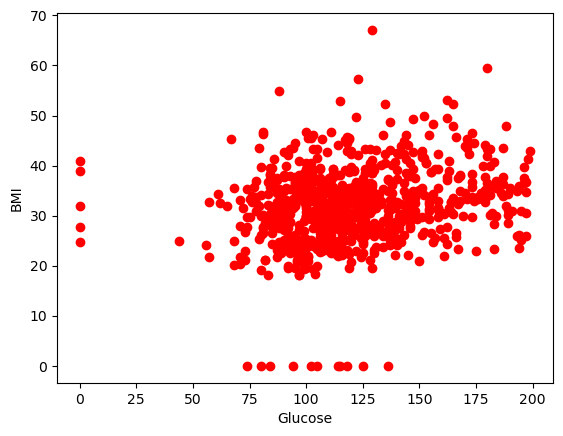

In [493]:
plt.scatter(df['Glucose'],df['BMI'] , color='red')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [494]:
# Check for zero values
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [495]:
# Replae zeros in skinthikness and insulin
df['SkinThickness'] = df['SkinThickness'].replace(0,int(df['SkinThickness'].mean()))
df['Insulin'] = df['Insulin'].replace(0,int(df['Insulin'].mean()))

In [496]:
# Remove outliers

def remove_outlier(df_in):
  for col_name in df_in.columns:
    
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    
    iqr = q3-q1
    
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    #outliers = ((df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)).any(axis=1)
    df_in = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]
  return df_in

In [497]:
df= remove_outlier(df)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,20,79,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1


In [498]:
(df == 0) .sum()

Pregnancies                  75
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     411
dtype: int64

After all the data cleaning

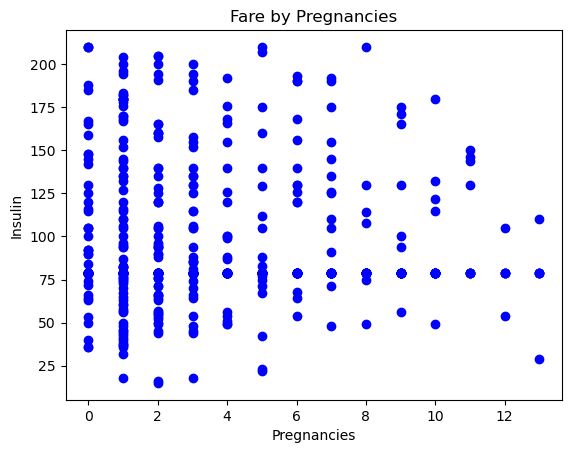

In [499]:
plt.scatter(df.Pregnancies, df['Insulin'], marker='o', color='b')

plt.xlabel('Pregnancies')
plt.ylabel('Insulin')
plt.title('Fare by Pregnancies')

plt.show()

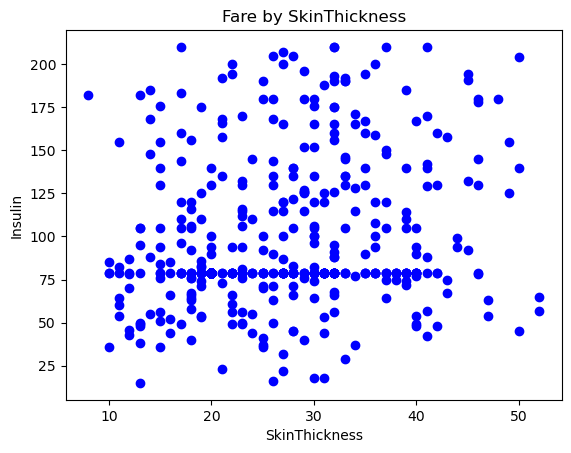

In [500]:
plt.scatter(df['SkinThickness'], df['Insulin'], marker='o', color='b')

plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('Fare by SkinThickness')

plt.show()

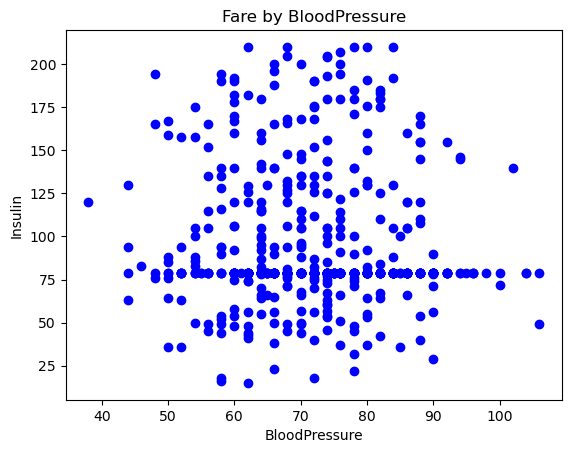

In [501]:
plt.scatter(df['BloodPressure'], df['Insulin'],color='b')

plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.title('Fare by BloodPressure')

plt.show()

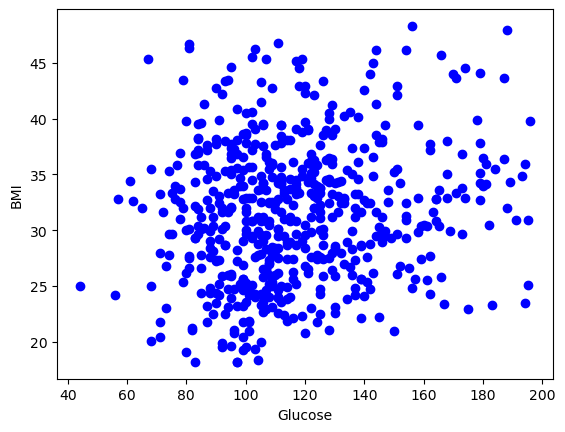

In [502]:
plt.scatter(df['Glucose'],df['BMI'],color='b')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [503]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [504]:
lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [505]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

In [506]:
classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        83
           1       0.76      0.58      0.66        33

    accuracy                           0.83       116
   macro avg       0.80      0.75      0.77       116
weighted avg       0.82      0.83      0.82       116



In [507]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8275862068965517

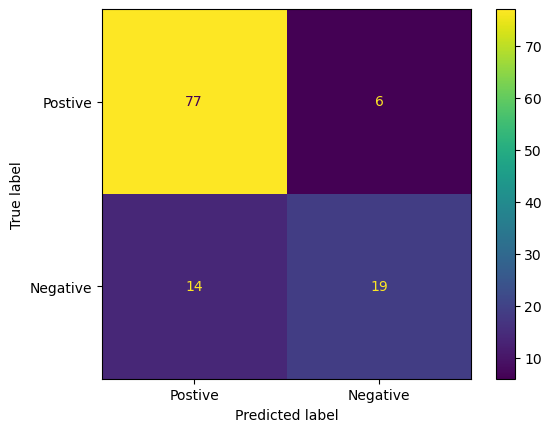

In [508]:
cm=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Postive','Negative'])
dis.plot()